In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Accuracy: 0.8212290502793296
Confusion Matrix:
[[92 13]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



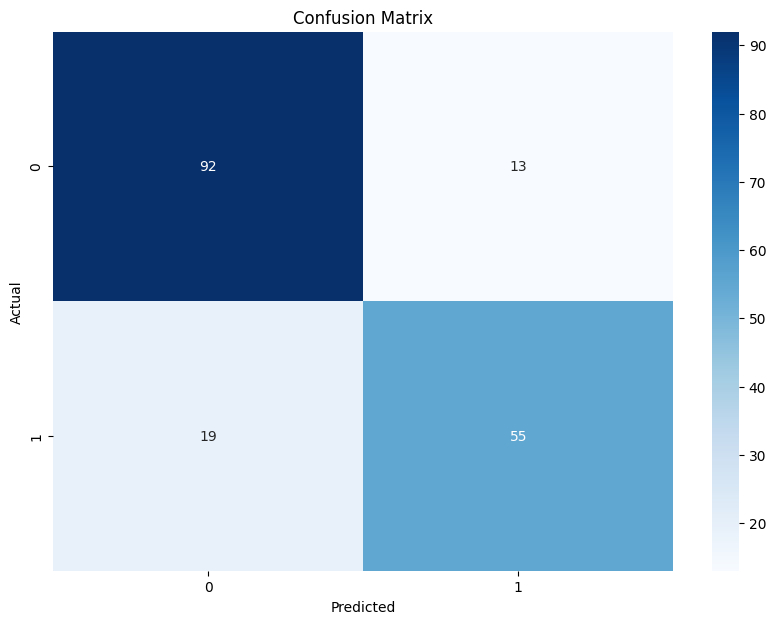

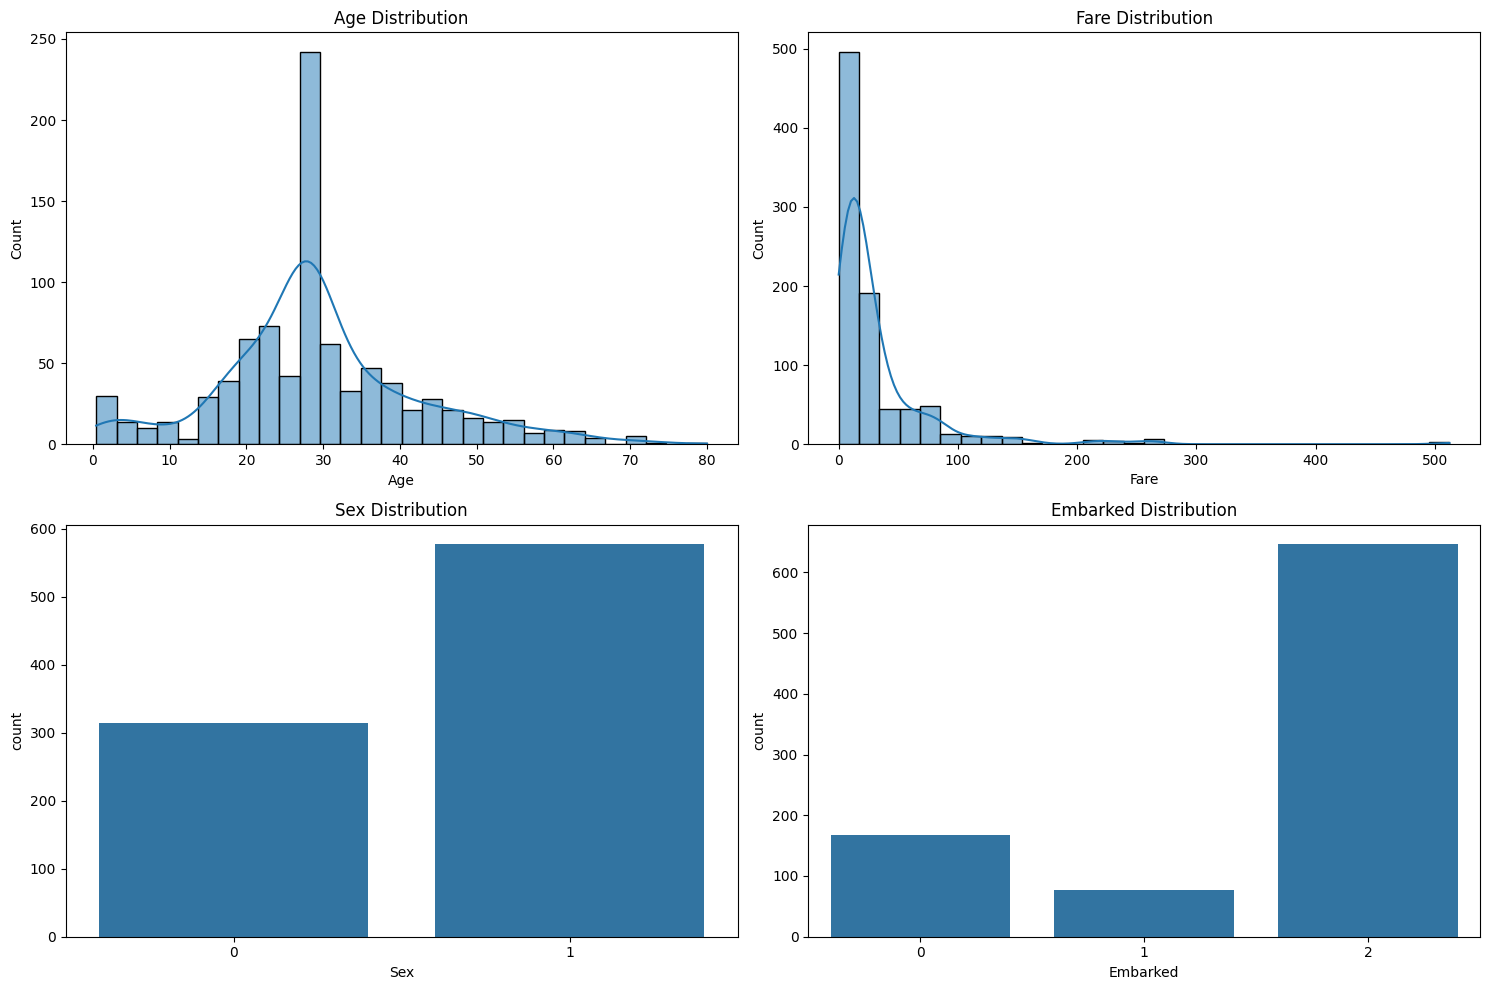

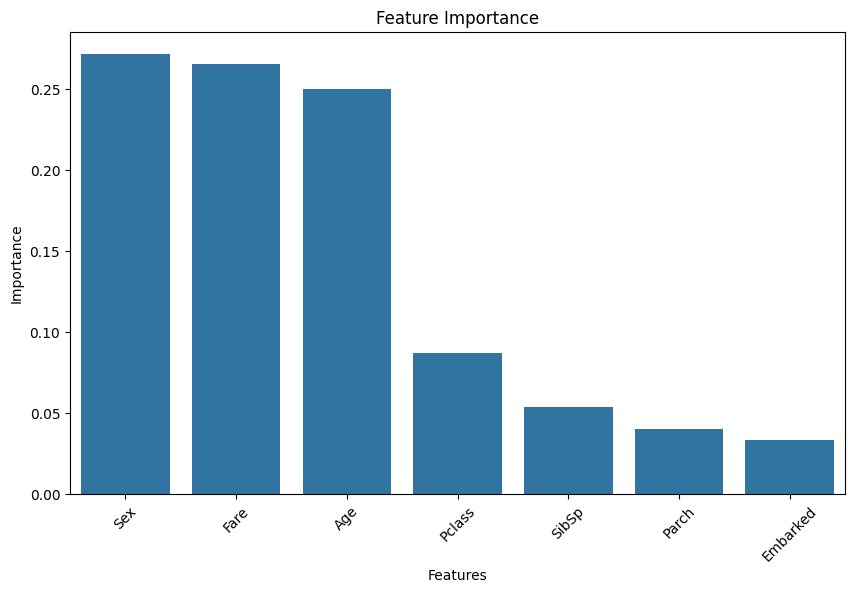

Prediction for new passenger: Not Survived


In [2]:
# Load the data
data = pd.read_csv('Titanic-Dataset.csv')  # Replace with the path to your dataset

# Data Preprocessing
# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Drop columns that are not useful for prediction
data = data.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)

# Encode categorical variables
sex_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()
data['Sex'] = sex_encoder.fit_transform(data['Sex'])
data['Embarked'] = embarked_encoder.fit_transform(data['Embarked'])

# Split the data into training and testing sets
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualizations
# Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Distribution of Features
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='Sex', data=data)
plt.title('Sex Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='Embarked', data=data)
plt.title('Embarked Distribution')

plt.tight_layout()
plt.show()

# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

# Predict survival
# Suppose we enter a new passenger data
new_passenger = pd.DataFrame({
    'Pclass': [3],
    'Sex': [sex_encoder.transform(['male'])[0]], 
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': [embarked_encoder.transform(['S'])[0]]  
})

# Predict whether the new passenger survived
new_prediction = model.predict(new_passenger)
print(f'Prediction for new passenger: {"Survived" if new_prediction[0] == 1 else "Not Survived"}')
